# Tarea metodos computacionales

Fecha de entrega: Viernes 18 de Febrero







# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-e^{-bt})
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-e^{-bt})-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

0. Establezca las siguietnes condiciones inciales.

1. Defina dos funciones, una para x y otra para y. 


In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from scipy import optimize
from scipy.interpolate import lagrange

In [22]:
#Posicion en x
def pos_x(t, v0, theta, u, alpha, g, b):
    T1 = (u * np.cos(alpha))*t  
    T2 =  (1/b)*(v0*np.cos(theta) - u*np.cos(alpha))
    T3 =  1-np.exp(-b*t)
    x = T1 + T2 * T3   
    return x

#Posicion en y
def pos_y(t, v0, theta, u, alpha, g, b):  
    T1 = (1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))
    T2 =  1-np.exp(-b * t)
    T3 =  (g/b - u * np.sin(alpha))*t
    y = T1*T2 - T3 
    return y 


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-e^{-bt})
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-e^{-bt})-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [23]:
# Incialisacion de parametros

v0 = 50 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8 #Aceleracion de la gravedad m/s2
params = v0, theta, u, alpha,  g, b

In [24]:
# Analicemos el movimiento del proyectil graficando x vs t, y vs t, y vs x

t = np.linspace(0, 10, 500)

x = pos_x(t, *params)
y = pos_y(t, *params)

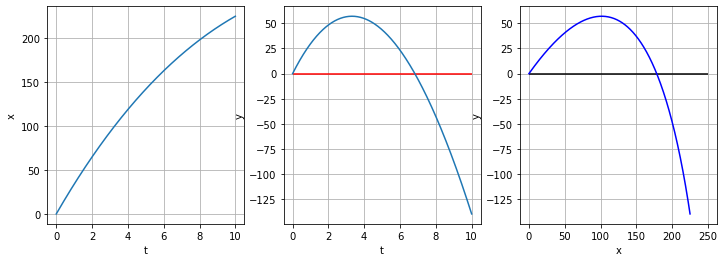

In [25]:
plt.figure(figsize = (12,4))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

plt.subplot(132)
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y")
plt.hlines(0, 0, 10, colors='red')
plt.grid()

plt.subplot(133)
plt.plot(x, y,"b-")
plt.xlabel("x")
plt.ylabel("y")
plt.hlines(0, 0, 250, colors='black')
plt.grid()

In [26]:
# Hallemos el valor de t con el que cae el proyectil y la distancia máxima que alcanza en x (R con 45°)

t_alcance = optimize.newton(pos_y, 10,  args=params)
print("El tiempo que demora el proyectil en caer nuevamente al suelo es de {}".format(t_alcance))
R = pos_x(t_alcance, *params)
print("El alcance máximo del proyectil con theta = 45° es de {}".format(R))

El tiempo que demora el proyectil en caer nuevamente al suelo es de 6.827653967594594
El alcance máximo del proyectil con theta = 45° es de 178.41981844694124


2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.

In [27]:
# Usemos el diccionario anterior para contruir un dataframe, pero primero generemos 1000 valores para t

# Usando un el t máximo anterior consideremos nuestro listado hasta t = 7
tdata = np.linspace(0,7,1000)

x_ = [pos_x(tdata[i],*params) for i in range(len(tdata))]
y_ = [pos_y(tdata[j],*params) for j in range(len(tdata))]
t_ = tdata

dicmov = {"X":x_,"Y":y_,"Tiempo":t_}

df_mov = pd.DataFrame.from_dict(dicmov)
print(df_mov)

              X         Y    Tiempo
0      0.000000  0.000000  0.000000
1      0.247661  0.247451  0.007007
2      0.495174  0.494335  0.014014
3      0.742539  0.740650  0.021021
4      0.989756  0.986399  0.028028
..          ...       ...       ...
995  180.980795 -4.639471  6.971972
996  181.104005 -4.869066  6.978979
997  181.227111 -5.099063  6.985986
998  181.350113 -5.329460  6.992993
999  181.473009 -5.560257  7.000000

[1000 rows x 3 columns]


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

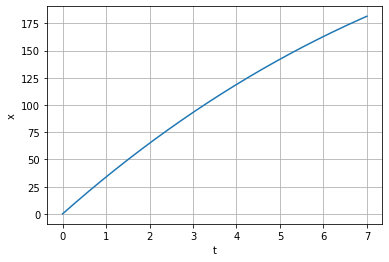

In [28]:
plt.figure()
plt.plot(df_mov["Tiempo"], df_mov["X"])
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

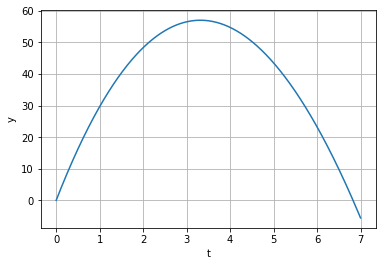

In [29]:
plt.figure()
plt.plot(df_mov["Tiempo"], df_mov["Y"])
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

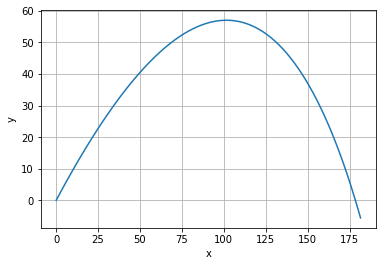

In [30]:
plt.figure()
plt.plot(df_mov["X"], df_mov["Y"])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.

**Solución**: Este alcance máximo fue calculado anteriormente y corresponde a $ R \approx 178.42\ m $

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

In [31]:
# Definamos el intervalo entre 10 y 90 grados para ver como se comporta R:

# 10 grados = 0.1745 rad
# 90 grados = pi/2 rad

deg10 = 10 * np.pi/180
deg90 = np.pi/2
deg5 = 5 * np.pi/180

vtheta = np.arange(deg10, deg90 + deg5, deg5)


v0 = 50 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45)
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8 #Aceleracion de la gravedad m/s2

t_vuel = []
for i in range(len(vtheta)):
    theta = vtheta[i]
    params2 = v0, theta, u, alpha,  g, b
    t_vuel.append(optimize.newton(pos_y,10,args = params2))

# Veamos que obtenemos el mismo valor de t de caída para theta = 45°, que en este caso está en la poscición 7
print(t_vuel[7])

# Obtengamos los valores de R para cada theta anterior

R_theta = []
for i in range(len(vtheta)):
    theta = vtheta[i]
    params2 = v0, theta, u, alpha,  g, b
    R_theta.append(pos_x(t_vuel[i],*params2))

print(R_theta[7])

6.827653967594594
178.41981844694124


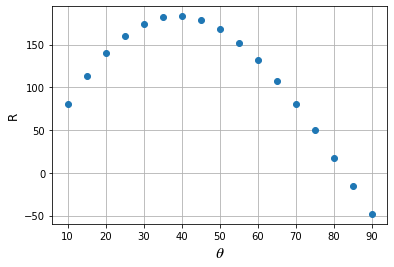

In [32]:
# Realizemos ahora sí la gráfica de R vs theta:

dgtheta = (180/np.pi)*vtheta

plt.figure()
plt.plot(dgtheta,R_theta,'o')
plt.xlabel("$𝜃$",size=16)
plt.ylabel("R",size=12)
plt.grid()

7. Realice una interpolacion de R como función de theta.

In [33]:
# Interpolemos usando Lagrange

from scipy.interpolate import lagrange

p_lg = lagrange(vtheta,R_theta)
print(p_lg)

            16             15            14           13           12
-4.155e-05 x  + 0.0005849 x  - 0.002619 x  + 0.00104 x  + 0.05059 x 
           11          10         9          8         7         6
 - 0.3103 x  + 0.9914 x  - 1.682 x - 0.2867 x + 10.06 x - 26.94 x
          5         4         3         2
 + 11.15 x + 145.2 x - 266.4 x - 238.6 x + 510.2 x + 1.386e-07


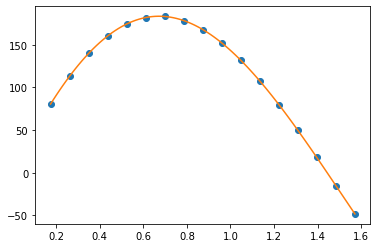

In [34]:
# Grafiquemos la comparación de las funciones sobre la interpolación y la función definida anteriormente

theta1 = np.linspace(np.min(vtheta),np.max(vtheta),100)

plt.figure()
plt.plot(vtheta,R_theta,'o')
plt.plot(theta1,p_lg(theta1))

In [35]:
# Hagamos ahora, una interpolación usando Spline Cúbico

from scipy.interpolate import CubicSpline

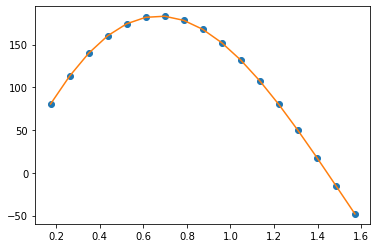

In [36]:
p_sc = CubicSpline(vtheta, R_theta) #Interpolacion
theta2 = np.linspace(np.min(vtheta),np.max(vtheta),100) #Valores de theta

plt.plot(vtheta,R_theta,"o" )
plt.plot(vtheta, p_sc(vtheta))

### Análisis:

Finalmente, es claro que los gráficos coinciden aunque tienen un método de interpolación diferente

# 2.  Interpolación Lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4
11250000*(1000000*x**6/(25*x**2 + 1)**3 - 50000*x**4/(25*x**2 + 1)**2 + 600*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**4
15750000000*x*(-250000*x**6/(25*x**2 + 1)**3 + 15000*x**4/(25*x**2 + 1)**2 - 250*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**5
15750000000*(100000000*x**8/(25*x**2 + 1)**4 - 7000000*x**6/(25*x**2 + 1)**3 + 150000*x**4/(25*x**2 + 1)**2 - 1000*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**5
35437500000000*x*(-20000000*x**8/(25*x**2 + 1)**4 + 1600000*x**6/(25*x**2 + 1)**3 - 42000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**6
35437500000000*(10000000000*x**10/(25*x**2 + 1)**5 - 900000000*x**8/(25*x**2 + 1)**4 + 28000000*x**6/(25*x**2 + 1)**3 - 350000*x

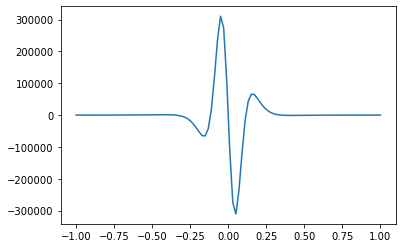

In [98]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
print(sp.diff(f_s(x),x, 6))
print(sp.diff(f_s(x),x, 7))
print(sp.diff(f_s(x),x, 8))
print(sp.diff(f_s(x),x, 9))
print(sp.diff(f_s(x),x, 10))

f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

# Hallemos la décima derivada de la función inicial para poder usar Hermit

f10 = sp.diff(f_s(x),x, 5)
fxn10 = sp.lambdify(x,f10,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

       4             3         2
3.316 x + 1.041e-17 x - 4.277 x + 5.204e-18 x + 1


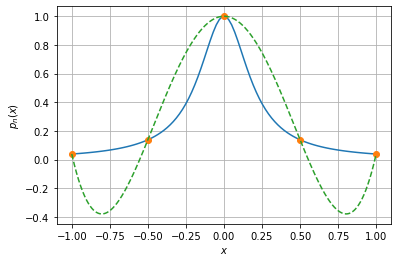

In [38]:
# Ya habiendo graficado la función, veamos las interpolaciones para una cantidad determinadad de puntos

# Para n = 4, tenemos:

x4 = np.linspace(-1,1,5)
y4 = [f_s(i) for i in x4]

# Interpolando para este número de datos, tenemos:

pn = lagrange(x4,y4)
print(pn)

# Tomemos un xreal para realizar la gráfica

xreal = np.linspace(-1,1,1000)

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x4,y4,'o')
plt.plot(xreal,pn(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

       8             7         6             5         4             3
53.69 x - 6.661e-15 x - 102.8 x + 1.899e-14 x + 61.37 x - 1.134e-14 x
         2
 - 13.2 x - 8.554e-16 x + 1


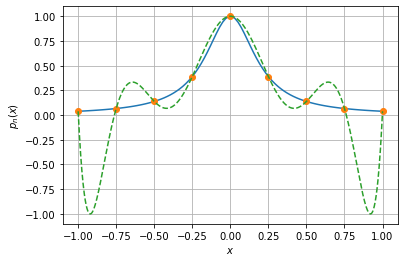

In [39]:
# Para n = 8, tenemos:

x8 = np.linspace(-1,1,9)
y8 = [f_s(i) for i in x8]

# Interpolando para este número de datos, tenemos:

pn = lagrange(x8,y8)
print(pn)

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x8,y8,'o')
plt.plot(xreal,pn(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

In [42]:
# Definamos por facilidad una función para cualquie cantidad de puntos:

def lag_int(n):
    xn = np.linspace(-1,1,n+1)
    yn = [f_s(i) for i in xn]
    # Interpolando para este número de datos, tenemos:

    pn = lagrange(xn,yn)
    return pn,xn,yn

In [44]:
print("Para el valor de n = 12, el polinomio hallado interpolando es: ")
print("{}".format(lag_int(12)[0]))
print("\n")
print("\nPara el valor de n = 16, el polinomio hallado interpolando es: ")
print("{}".format(lag_int(16)[0]))
print("\n")
print("Para el valor de n = 20, el polinomio hallado interpolando es:")
print(" {}".format(lag_int(20)[0]))

Para el valor de n = 12, el polinomio hallado interpolando es: 
       12             11        10             9        8             7
909.9 x  - 1.098e-12 x  - 2336 x  - 1.838e-11 x + 2202 x - 1.946e-12 x
          6             5         4             3         2
 - 955.4 x + 2.929e-13 x + 198.7 x + 7.632e-14 x - 19.58 x - 4.255e-15 x + 1



Para el valor de n = 16, el polinomio hallado interpolando es: 
          16             15             14             13
1.54e+04 x  - 8.588e-11 x  - 4.971e+04 x  + 7.641e-10 x 
              12             11             10             9
 + 6.374e+04 x  + 3.534e-09 x  - 4.187e+04 x  + 1.819e-09 x
              8             7        6             5       4
 + 1.521e+04 x + 1.506e-10 x - 3100 x + 1.928e-11 x + 352 x
              3         2
 + 4.931e-13 x - 22.78 x - 3.776e-15 x + 1


Para el valor de n = 20, el polinomio hallado interpolando es:
            20             19             18             17
2.602e+05 x  - 1.948e-08 x  - 1.012e+0

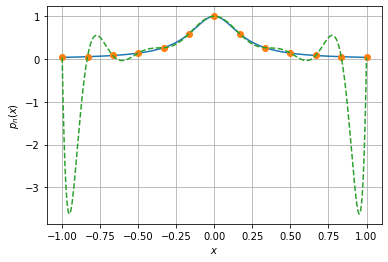

In [45]:
x12 = lag_int(12)[1]
y12 = lag_int(12)[2]
pn12 = lag_int(12)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x12,y12,'o')
plt.plot(xreal,pn12(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

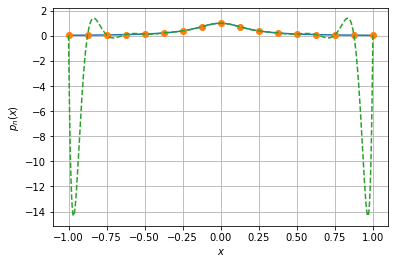

In [46]:
x16 = lag_int(16)[1]
y16 = lag_int(16)[2]
pn16 = lag_int(16)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x16,y16,'o')
plt.plot(xreal,pn16(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

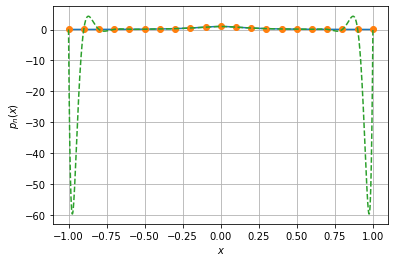

In [47]:
x20 = lag_int(20)[1]
y20 = lag_int(20)[2]
pn20 = lag_int(20)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x20,y20,'o')
plt.plot(xreal,pn20(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

**Solución:**
Resulta claro al observar las gráficas anteriores como el error aumenta junto con el 'n', puesto que se ve como la gráfica real se distancia de la gráfica del polinomio.

Consideremos entonces hallar el epsilon de forma analítica para lo que consideramos el n = 4 y el $\xi = 0.5$. Usemos entonces la función anterior para calcular estos valores junto con las derivadas puestas al inicio:

$$\epsilon = \frac{1}{(5)!} f^{(5)}(\xi)(x - x_0)(x - x_1)(x - x_2)(x - x_3)(x - x_4)$$


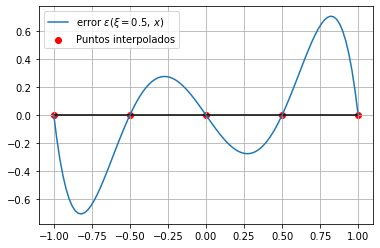

In [66]:
# Escribamos la función del error que depende de x y 𝜉

import math as mt

def eps(psi, x):
    xn = np.linspace(-1,1,5)
    mult = 1
    for i in range(len(xn)):
        mult *= (x-xn[i])
    
    return (mt.factorial(5))**(-1)*fxn5(psi)*mult

# Considerando el 𝜉 = 0.5, realizemos la gráfica de como se comporta esta función:

psik = 0.5
x=np.linspace(-1,1,100)
xn = np.linspace(-1,1,5)
error=np.array([eps(psik,x[i]) for i in range(len(x))])
plt.plot(x, error, label=r'error $\epsilon(\xi={},\,x)$'.format(psik))
plt.hlines(0,-1,1, color='black')
plt.scatter(xn, eps(psik,xn),label='Puntos interpolados',color='red')
plt.legend()
plt.grid()

**Análisis:**
Si superponemos la gráfica del error con la de la función real y la interpolación, vemos que los valores que se interpolaron no tienen error asociado, pero que hay errores de gran magnitud para algunos puntos intermedios de la función.

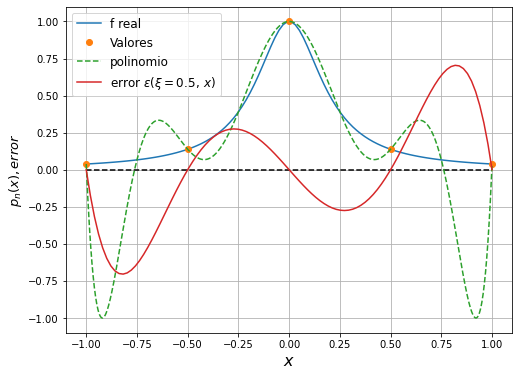

In [67]:
# Veamos la gráfica antes mencionada.

plt.figure(figsize=(8,6))
plt.plot(x_, f_s(x_),label='f real')
plt.plot(x4,y4,'o',label='Valores')
plt.plot(xreal,pn(xreal),'--',label='polinomio')
plt.plot(x, error,label=r'error $\epsilon(\xi={},\,x)$'.format(psik))
plt.hlines(0,-1,1, linestyles='dashed',color='black' )
plt.xlabel("$x$",fontsize=16)
plt.ylabel("$p_n(x),error$",fontsize=13)
plt.legend(fontsize=12)
plt.grid()

# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Hermite, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 

**Solución_**
Para ahorrar código reultilizaremos gran parte del usado en la interpolación de Lagrange, pero ahora considerando el cambio de ecuaciones y métodos necesarios para el análisis de la interpolación de Hermite

In [71]:
# Como f(x) ya está definido pasamos a realizar la interpolación directamente

def hermit(n):
    xn = np.linspace(-1,1,n+1)
    yn = [f_s(i) for i in xn]
    # Interpolando para este número de datos, tenemos:

    pn = np.polynomial.hermite.Hermite.fit(xn,yn,n)
    return pn,xn,yn

In [77]:
# Para n = 4

print("Para el valor de n = 4, el polinomio hallado interpolando es: ")
print("{}".format(hermit(4)[0]))

Para el valor de n = 4, el polinomio hallado interpolando es: 
1.3481432360742724 - 8.426000324584082e-16·H₁(x) +
1.4174403183023898·H₂(x) - 1.9197824301812933e-16·H₃(x) +
0.2072281167108756·H₄(x)


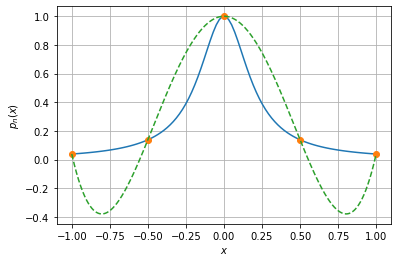

In [76]:
# Grafiquemos la función real y el polinomio de Hermit

x4 = hermit(4)[1]
y4 = hermit(4)[2]
pn4 = hermit(4)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x4,y4,'o')
plt.plot(xreal,pn4(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

In [78]:
# Para n = 8

print("Para el valor de n = 8, el polinomio hallado interpolando es: ")
print("{}".format(hermit(8)[0]))

Para el valor de n = 8, el polinomio hallado interpolando es: 
199.98177738190722 - 7.338453819646734e-13·H₁(x) +
458.22949850637076·H₂(x) - 1.1487936059836748e-12·H₃(x) +
131.80893162472205·H₄(x) - 2.4260870036074997e-13·H₅(x) +
10.138049956298286·H₆(x) - 1.0401907113691029e-14·H₇(x) +
0.20972383029164535·H₈(x)


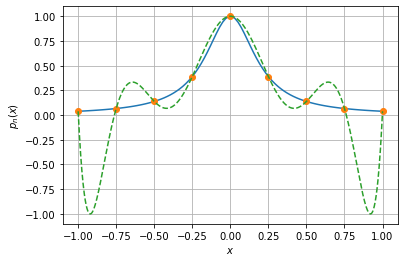

In [80]:
# Grafiquemos la función real y el polinomio de Hermit

x8 = hermit(8)[1]
y8 = hermit(8)[2]
pn8 = hermit(8)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x8,y8,'o')
plt.plot(xreal,pn8(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

In [87]:
# Para n = 12

print("Para el valor de n = 12, el polinomio hallado interpolando es: ")
print("{}".format(hermit(12)[0]))

Para el valor de n = 12, el polinomio hallado interpolando es: 
91586.05345969269 - 5.452837174507129e-05·H₁(x) +
297217.3212203347·H₂(x) - 4.9704225549655955e-05·H₃(x) +
134022.39890026188·H₄(x) - 1.0880457951468712e-05·H₅(x) +
19347.69050948922·H₆(x) - 8.51182163297561e-07·H₇(x) +
1122.7539110280427·H₈(x) - 2.5913023564432752e-08·H₉(x) +
27.040562328814946·H₁₀(x) - 2.583596788311748e-10·H₁₁(x) +
0.2221375926118222·H₁₂(x)


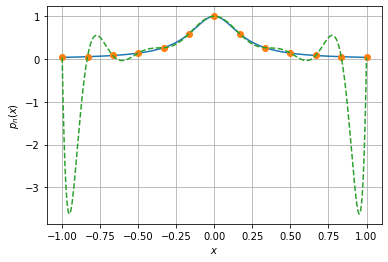

In [81]:
# Grafiquemos la función real y el polinomio de Hermit

x12 = hermit(12)[1]
y12 = hermit(12)[2]
pn12 = hermit(12)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x12,y12,'o')
plt.plot(xreal,pn12(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

In [83]:
# Para n = 16

print("Para el valor de n = 16, el polinomio hallado interpolando es: ")
print("{}".format(hermit(16)[0]))

Para el valor de n = 16, el polinomio hallado interpolando es: 
78692821.44555502 - 844.9978358195118·H₁(x) + 332329882.3658525·H₂(x) -
1047.5542358764262·H₃(x) + 204700667.63037708·H₄(x) -
334.0099463974002·H₅(x) + 43235679.47574781·H₆(x) -
42.26987133385471·H₇(x) + 4077354.844569076·H₈(x) -
2.4968943746233574·H₉(x) + 191431.21903966446·H₁₀(x) -
0.07242078881775435·H₁₁(x) + 4596.643257904478·H₁₂(x) -
0.0009876380486667816·H₁₃(x) + 53.37594253155663·H₁₄(x) -
5.003850233256321e-06·H₁₅(x) + 0.23504310371017814·H₁₆(x)


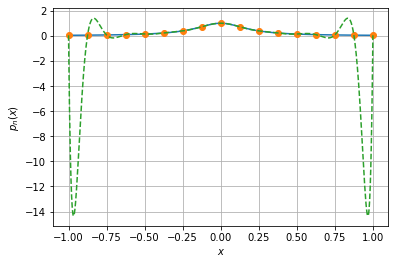

In [84]:
# Grafiquemos la función real y el polinomio de Hermit

x16 = hermit(16)[1]
y16 = hermit(16)[2]
pn16 = hermit(16)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x16,y16,'o')
plt.plot(xreal,pn16(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

In [86]:
# Para n = 20

print("Para el valor de n = 20, el polinomio hallado interpolando es: ")
print("{}".format(hermit(20)[0]))

Para el valor de n = 20, el polinomio hallado interpolando es: 
-343390230.1469268 - 104465.93258803264·H₁(x) - 1442485969.8748066·H₂(x) -
164026.7034001886·H₃(x) - 851429164.0286572·H₄(x) -
68698.84410998398·H₅(x) - 158479722.09851092·H₆(x) -
11992.366489514696·H₇(x) - 10273248.665475475·H₈(x) -
1047.0514154534135·H₉(x) + 20740.33254844078·H₁₀(x) -
49.88080192473495·H₁₁(x) + 30382.723251431806·H₁₂(x) -
1.3409328347620058·H₁₃(x) + 1386.5933937230363·H₁₄(x) -
0.020091111172240123·H₁₅(x) + 27.243949814019775·H₁₆(x) -
0.00015499716348969014·H₁₇(x) + 0.24940398680303194·H₁₈(x) -
4.756936538881526e-07·H₁₉(x) + 0.0008627540312040632·H₂₀(x)


/home/harold/anaconda3/lib/python3.9/site-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


/home/harold/anaconda3/lib/python3.9/site-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


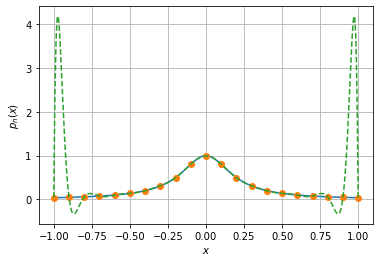

In [85]:
# Grafiquemos la función real y el polinomio de Hermit

x20 = hermit(20)[1]
y20 = hermit(20)[2]
pn20 = hermit(20)[0]

plt.figure()
plt.plot(x_, f_s(x_))
plt.plot(x20,y20,'o')
plt.plot(xreal,pn20(xreal),'--')
plt.xlabel("$x$")
plt.ylabel("$p_n(x)$")
plt.grid()

2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

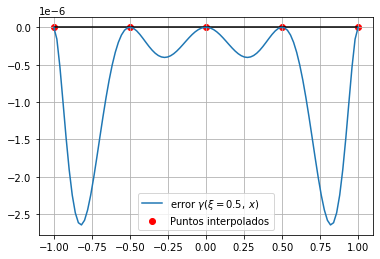

In [99]:
import math as mt

# Escribamos la función del error que depende de x y 𝜉, llamemosla en este caso gamma

def gamma(psi, x):
    xn = np.linspace(-1,1,5)
    mult = 1
    for i in range(len(xn)):
        mult *= (x-xn[i])**2
    
    return (mt.factorial(10))**(-1)*fxn10(psi)*mult

# Considerando el 𝜉 = 0.5, realizemos la gráfica de como se comporta esta función:

psik = 0.5
x = np.linspace(-1,1,100)
xn = np.linspace(-1,1,5)
error_g = np.array([gamma(psik,x[i]) for i in range(len(x))])
plt.plot(x, error_g, label=r'error $\gamma(\xi={},\,x)$'.format(psik))
plt.hlines(0,-1,1, color='black')
plt.scatter(xn, eps(psik,xn),label='Puntos interpolados',color='red')
plt.legend()
plt.grid()

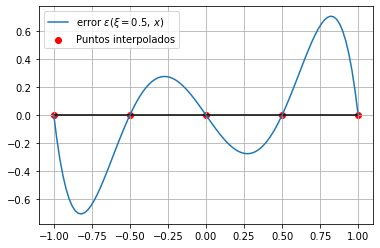

In [96]:
# Comparando con la función de error anterior

psik = 0.5
x = np.linspace(-1,1,100)
xn = np.linspace(-1,1,5)
error_l = np.array([eps(psik,x[i]) for i in range(len(x))])
plt.plot(x, error_l, label=r'error $\epsilon(\xi={},\,x)$'.format(psik))
plt.hlines(0,-1,1, color='black')
plt.scatter(xn, eps(psik,xn),label='Puntos interpolados',color='red')
plt.legend()
plt.grid()

**Análisis:**
Al ver estas dos gráficas de erro pareciera que el método de Hermit arroja un mayor valor que el de Lagrange.